# Importing important libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df=pd.DataFrame(credit_card_data,columns=['Time','Amount','Class'])
df.sample(5)

,Time,Amount,Class
248401,153932.0,24.90,0
49424,44053.0,132.27,0
262059,160292.0,0.01,0
102520,68237.0,35.15,0
127550,78371.0,0.89,0


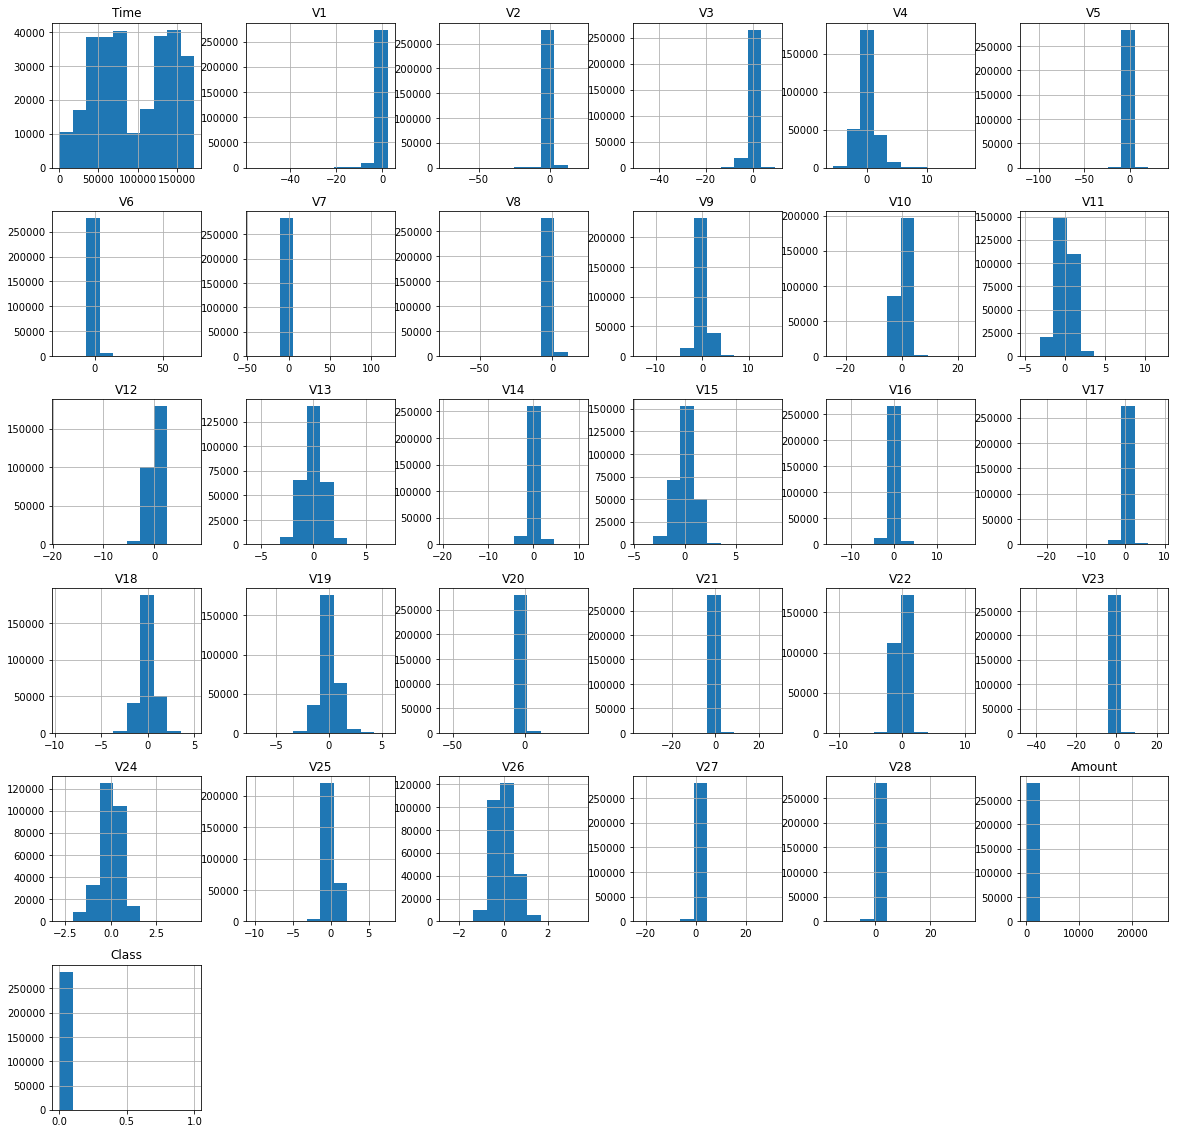

In [5]:
credit_card_data.hist(figsize=(20,20))
plt.show() 


#Most of the V parameters are found to
#be clustered around 0 with some V's showing fairly large outliers and some showing no outliers at all.

<AxesSubplot:>

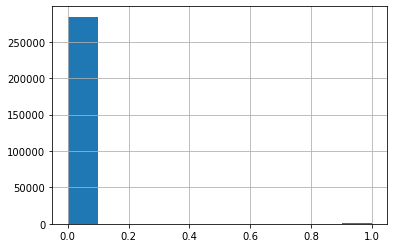

In [6]:
credit_card_data.Class.hist() #visually interpreting the transactions. Clear class imbalance.

# Data Pre-Processing

In [7]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

Number of Fraud cases     : 492
Number of Non Fraud cases : 284315


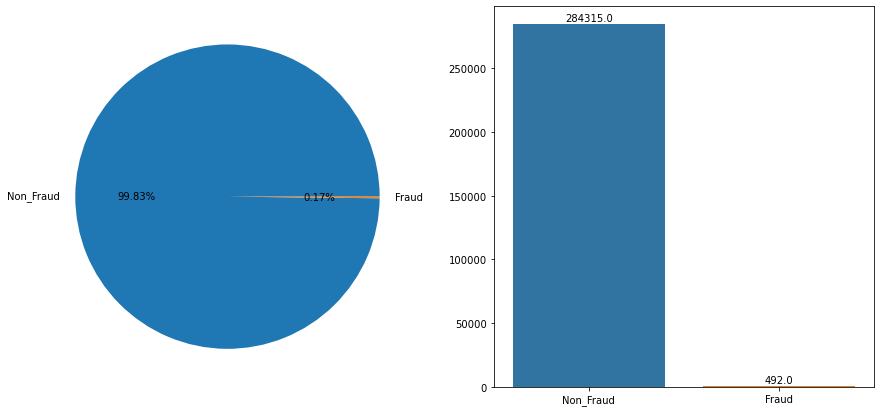

In [10]:
Non_Fraud, Fraud = credit_card_data['Class'].value_counts()
print('Number of Fraud cases     :', Fraud)
print('Number of Non Fraud cases :', Non_Fraud)
values = [Non_Fraud, Fraud]
labels = ['Non_Fraud', 'Fraud']
fig, axes = plt.subplots(1,2, figsize = (15,7))
axes[0].pie(values, labels = labels, autopct = '%.2f%%')
barp = sns.barplot(x = labels , y = values, ax = axes[1])
for x in barp.patches:
    barp.annotate(format(x.get_height()),(x.get_x() + x.get_width()/2 , x.get_height()) , ha = 'center', va = 'center', xytext = (0,6), textcoords = 'offset points')
plt.show()

In [11]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [12]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [13]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [16]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [17]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

Number of Fraud cases     : 492
Number of Non Fraud cases : 492


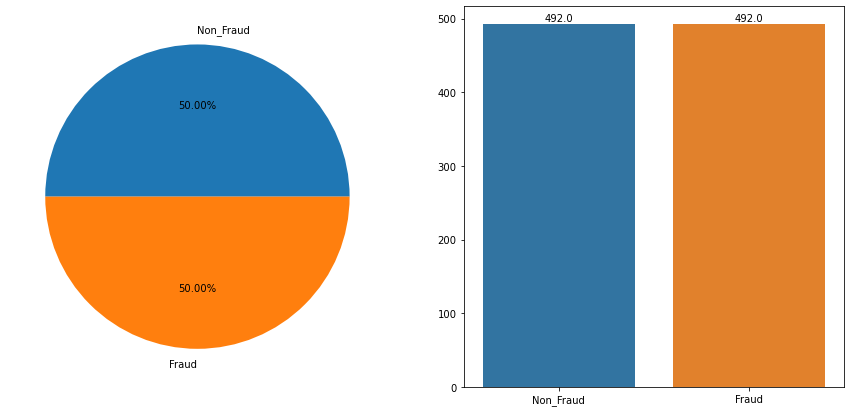

In [18]:
Non_Fraud, Fraud = new_dataset['Class'].value_counts()
print('Number of Fraud cases     :', Fraud)
print('Number of Non Fraud cases :', Non_Fraud)
values = [Non_Fraud, Fraud]
labels = ['Non_Fraud', 'Fraud']
fig, axes = plt.subplots(1,2, figsize = (15,7))
axes[0].pie(values, labels = labels, autopct = '%.2f%%')
barp = sns.barplot(x = labels , y = values, ax = axes[1])
for x in barp.patches:
    barp.annotate(format(x.get_height()),(x.get_x() + x.get_width()/2 , x.get_height()) , ha = 'center', va = 'center', xytext = (0,6), textcoords = 'offset points')
plt.show()

In [19]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
182914,125582.0,-1.133353,0.807346,0.335179,-0.246120,1.907576,-0.457185,1.363960,-0.107106,-0.527933,...,0.002291,-0.095884,-0.657837,0.141620,1.370342,-0.455861,-0.146808,0.065861,16.95,0
76067,56381.0,1.318048,-0.292874,-0.161474,-0.615663,0.139046,0.710577,-0.541969,0.327050,0.511313,...,-0.188136,-0.604235,-0.078923,-1.707831,0.186702,1.030179,-0.071451,-0.025536,1.89,0
226030,144477.0,1.926294,-0.404763,-0.339882,0.294109,-0.394627,0.221027,-0.694231,0.139829,1.028574,...,0.261856,0.990343,0.136835,0.758648,-0.091183,-0.267339,0.042716,-0.036806,12.99,0
200342,133395.0,1.916594,0.571534,-0.475653,3.552174,0.474324,0.207859,0.026125,0.063140,-0.925001,...,-0.457647,-1.515205,0.600018,0.446316,-0.654522,-0.659127,-0.030765,-0.025281,7.56,0
140050,83511.0,1.157394,0.082136,0.569692,0.513481,-0.424416,-0.337961,-0.180418,0.123015,-0.082636,...,-0.175532,-0.561485,0.189862,0.191860,0.053477,0.097402,-0.022762,0.005530,2.69,0


In [20]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [21]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [22]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97182.250000,-0.127478,-0.007457,-0.084617,0.014660,-0.131870,0.084718,-0.165886,-0.074563,-0.020561,...,-0.009353,-0.073197,0.014330,0.005099,0.021313,0.009272,0.035079,-0.016739,-0.015717,93.066646
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [23]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [24]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
182914  125582.0 -1.133353  0.807346  0.335179 -0.246120  1.907576 -0.457185   
76067    56381.0  1.318048 -0.292874 -0.161474 -0.615663  0.139046  0.710577   
226030  144477.0  1.926294 -0.404763 -0.339882  0.294109 -0.394627  0.221027   
200342  133395.0  1.916594  0.571534 -0.475653  3.552174  0.474324  0.207859   
140050   83511.0  1.157394  0.082136  0.569692  0.513481 -0.424416 -0.337961   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [25]:

print(Y)

182914    0
76067     0
226030    0
200342    0
140050    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Split the data into Training data & Testing Data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [28]:
print(Y.shape, Y_train.shape, Y_test.shape)

(984,) (787,) (197,)


# Model Training

Logistic Regression

In [29]:
model = LogisticRegression()

In [30]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation
Accuracy Score

In [31]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9135959339263025


In [33]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [34]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.8730964467005076




# Clasification Report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(X_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       106
           1       0.84      0.90      0.87        91

    accuracy                           0.87       197
   macro avg       0.87      0.88      0.87       197
weighted avg       0.88      0.87      0.87       197



# KNN Algorithm

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


# Input data files are available in the "../input/" directory.

knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)

In [37]:
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
print("classifier created")
score = knn.score(X_test,Y_test)
print(score)

classifier created
0.6649746192893401


Hence Accuracy of Logistic Regression is grater then KNN algorithm